In [78]:
import sys
sys.modules.pop('CLASS_BABY')
sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [79]:
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)

In [80]:
list(T.columns.values)

['BABY_IDS',
 'GENDER',
 'WEIGHT_GRAMS',
 'GEST_AGE_DAYS',
 'DELIVERY',
 'BIRTH_DATE',
 'FILE',
 'DELTA_SEC_MEASURE',
 'MED_SPO2',
 'MED_PR',
 'MED_PI',
 'MEAN_SPO2',
 'MEAN_PR',
 'MEAN_PI',
 'STD_SPO2',
 'STD_PR',
 'STD_PI',
 'PHN',
 'WRIST',
 'FOOT',
 'BRADY_SEC_PR',
 'BRADY_RATIO_PR',
 'BRADY_RATIO_PR_m10',
 'BRADY_RATIO_PR_m20',
 'BRADY_RATIO_PR_m30',
 'BRADY_RATIO_PR_m40',
 'BRADY_SEC_SPO2',
 'BRADY_RATIO_SPO2',
 'BRADY_SEC_PR_DYN',
 'BRADY_RATIO_PR_DYN',
 'BRADY_NUM_PER_HOUR_PR',
 'BRADY_NUM_PER_HOUR_PR_m10',
 'BRADY_NUM_PER_HOUR_PR_m20',
 'BRADY_NUM_PER_HOUR_PR_m30',
 'BRADY_NUM_PER_HOUR_PR_m40',
 'BRADY_NUM_PER_HOUR_PR_dyn',
 'BRADY_NUM_PER_HOUR_PR_anytime',
 'BRADY_NUM_PER_HOUR_PR_m10_anytime',
 'BRADY_NUM_PER_HOUR_PR_m20_anytime',
 'BRADY_NUM_PER_HOUR_PR_m30_anytime',
 'BRADY_NUM_PER_HOUR_PR_m40_anytime',
 'BRADY_NUM_PER_HOUR_PR_dyn_anytime',
 'BRADY_DURATION_MEDIAN_PR',
 'BRADY_DURATION_MEDIAN_PR_m10',
 'BRADY_DURATION_MEDIAN_PR_m20',
 'BRADY_DURATION_MEDIAN_PR_m30',
 'BRADY

In [81]:
total = len(np.unique(T['BABY_IDS']))
print('TOT NUMBER OF BABIES: ',total)

def unique_id(table,tot=total):
    '''input: table with the selection on the category you want to count
       output: the number of baby from that table and the fraction 
       of the total number of babies'''
    # take the same baby id just once (as we want to count babies)
    n = len(np.unique(table['BABY_IDS']))
    return n, n/float(tot)

TOT NUMBER OF BABIES:  268


In [82]:
np.median(T['BRADY_DURATION_MEDIAN_PR_m40'].dropna())

34.0

In [83]:
T['BRADY_DURATION_MEDIAN_PR_m10'].unique()

array([ nan,  22.,  28.,  26.,  16.,  69.,  74.,  78.,  36.,  38.,  30.,
       174., 164.,  34.,  29.,  18.,  24., 136.,  94.,  20.,  27.,  31.,
        35.,  77.,  58.,  32., 112.,  40., 104.,  42.,  43.,  47.,  66.,
        44.,  39.,  60.,  63., 365.,  37.,  41., 124., 216.,  33.,  17.,
        21.,  59.,  55.,  50.,  48., 258.,  92.,  23.,  70.,  46.,  25.,
        19., 254., 101., 110., 162.,  64.,  72., 129., 634., 140.,  80.,
        62., 123.,  68.,  52.,  51.,  54., 190., 168.,  75.,  73.,  87.,
        53.,  76.,  89., 128., 102., 170.,  56.,  49., 147., 644., 116.,
       103.,  61.,  45., 155.])

In [84]:
wrist = T[T['WRIST']==True]
foot = T[T['FOOT']==True]

# Percentage of time spent in brady (column 3)

In [85]:
print('Standard threshold = 120 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_RATIO_PR']))
print('STD = ',np.std(wrist['BRADY_RATIO_PR']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_RATIO_PR']))
print('STD = ',np.std(foot['BRADY_RATIO_PR']))

Standard threshold = 120 bpm
##### wrist #####
Mean =  0.4308914596731191
STD =  0.30449388580567727
##### foot #####
Mean =  0.4263504522046887
STD =  0.34302158544155364


In [87]:
print('Standard threshold minus 20 = 100 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_RATIO_PR_m20']))
print('STD = ',np.std(wrist['BRADY_RATIO_PR_m20']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_RATIO_PR_m20']))
print('STD = ',np.std(foot['BRADY_RATIO_PR_m20']))

Standard threshold minus 20 = 100 bpm
##### wrist #####
Mean =  0.05912717905590444
STD =  0.12671541327888503
##### foot #####
Mean =  0.05070208227555947
STD =  0.12090627692780255


In [88]:
print('Standard threshold minus 40 = 80 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_RATIO_PR_m40']))
print('STD = ',np.std(wrist['BRADY_RATIO_PR_m40']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_RATIO_PR_m40']))
print('STD = ',np.std(foot['BRADY_RATIO_PR_m40']))

Standard threshold minus 40 = 80 bpm
##### wrist #####
Mean =  0.012191475650443684
STD =  0.04048239263803251
##### foot #####
Mean =  0.008001583304676011
STD =  0.03380835522830453


In [89]:
print('dynamic threshold = 2/3 median')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_RATIO_PR_DYN']))
print('STD = ',np.std(wrist['BRADY_RATIO_PR_DYN']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_RATIO_PR_DYN']))
print('STD = ',np.std(foot['BRADY_RATIO_PR_DYN']))

dynamic threshold = 2/3 median
##### wrist #####
Mean =  0.011576483515629848
STD =  0.03923522286028318
##### foot #####
Mean =  0.007553014755783772
STD =  0.032676167082224504


# Number of episodes per hour (Column 1)

In [45]:
print('Standard threshold = 120 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR']))

Standard threshold = 120 bpm
##### wrist #####
Mean =  17.060270641494085
STD =  12.11744157632316
##### foot #####
Mean =  18.264200540951375
STD =  16.063519109791972


In [46]:
print('Standard threshold minus 20 = 100 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_m20']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_m20']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_m20']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_m20']))

Standard threshold minus 20 = 100 bpm
##### wrist #####
Mean =  3.0277489575084213
STD =  6.83588094875586
##### foot #####
Mean =  2.7647930552839046
STD =  7.1755814109014215


In [47]:
print('Standard threshold minus 40 = 80 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_m40']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_m40']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_m40']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_m40']))

Standard threshold minus 40 = 80 bpm
##### wrist #####
Mean =  0.5928525736899969
STD =  1.8001326562817714
##### foot #####
Mean =  0.425330846337081
STD =  1.4658171445604578


In [90]:
print('dynamic threshold = 2/3 median')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_dyn']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_dyn']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_dyn']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_dyn']))

dynamic threshold = 2/3 median
##### wrist #####
Mean =  0.5619049865837765
STD =  1.7347680850999747
##### foot #####
Mean =  0.39409340660648295
STD =  1.5102846809146386


# Number of episodes per hour of any duration (Column 4)

In [49]:
print('Standard threshold = 120 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_anytime']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_anytime']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_anytime']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_anytime']))

Standard threshold = 120 bpm
##### wrist #####
Mean =  37.105409912607115
STD =  24.157593372516846
##### foot #####
Mean =  40.530650318263056
STD =  31.844126291250287


In [50]:
print('Standard threshold minus 20 = 100 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_m20_anytime']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_m20_anytime']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_m20_anytime']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_m20_anytime']))

Standard threshold minus 20 = 100 bpm
##### wrist #####
Mean =  9.576226889584651
STD =  16.71248984868054
##### foot #####
Mean =  10.033601493500733
STD =  19.339835630557445


In [51]:
print('Standard threshold minus 40 = 80 bpm')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_m40_anytime']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_m40_anytime']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_m40_anytime']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_m40_anytime']))

Standard threshold minus 40 = 80 bpm
##### wrist #####
Mean =  1.2604980221249822
STD =  3.522025003233895
##### foot #####
Mean =  0.9860317601252828
STD =  3.0464141245935292


In [91]:
print('dynamic threshold = 2/3 median')
print('##### wrist #####')
print('Mean = ',np.mean(wrist['BRADY_NUM_PER_HOUR_PR_dyn_anytime']))
print('STD = ',np.std(wrist['BRADY_NUM_PER_HOUR_PR_dyn_anytime']))
print('##### foot #####')
print('Mean = ',np.mean(foot['BRADY_NUM_PER_HOUR_PR_dyn_anytime']))
print('STD = ',np.std(foot['BRADY_NUM_PER_HOUR_PR_dyn_anytime']))

dynamic threshold = 2/3 median
##### wrist #####
Mean =  1.1649231847742616
STD =  3.488929812575716
##### foot #####
Mean =  0.9074257717468659
STD =  2.869700437565609


# Duration of episodes (column 2)

In [70]:
print('Standard threshold = 120 bpm')
print('##### wrist #####')
print('Median = ',np.median(wrist['BRADY_DURATION_MEDIAN_PR'].dropna()))
print('p25 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR'].dropna(),25))
print('p75 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR'].dropna(),75))

print('##### foot #####')
print('Median = ',np.median(foot['BRADY_DURATION_MEDIAN_PR'].dropna()))
print('p25 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR'].dropna(),25))
print('p75 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR'].dropna(),75))

Standard threshold = 120 bpm
##### wrist #####
Median =  37.0
p25 =  27.0
p75 =  56.0
##### foot #####
Median =  39.0
p25 =  26.0
p75 =  74.0


In [71]:
print('Standard threshold minus 20 = 100 bpm')
print('##### wrist #####')
print('Median = ',np.median(wrist['BRADY_DURATION_MEDIAN_PR_m20'].dropna()))
print('p25 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_m20'].dropna(),25))
print('p75 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_m20'].dropna(),75))

print('##### foot #####')
print('Median = ',np.median(foot['BRADY_DURATION_MEDIAN_PR_m20'].dropna()))
print('p25 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_m20'].dropna(),25))
print('p75 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_m20'].dropna(),75))

Standard threshold minus 20 = 100 bpm
##### wrist #####
Median =  27.0
p25 =  22.0
p75 =  41.5
##### foot #####
Median =  28.0
p25 =  21.0
p75 =  41.0


In [72]:
print('Standard threshold minus 40 = 80 bpm')
print('##### wrist #####')
print('Median = ',np.median(wrist['BRADY_DURATION_MEDIAN_PR_m40'].dropna()))
print('p25 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_m40'].dropna(),25))
print('p75 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_m40'].dropna(),75))

print('##### foot #####')
print('Median = ',np.median(foot['BRADY_DURATION_MEDIAN_PR_m40'].dropna()))
print('p25 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_m40'].dropna(),25))
print('p75 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_m40'].dropna(),75))

Standard threshold minus 40 = 80 bpm
##### wrist #####
Median =  36.0
p25 =  24.0
p75 =  60.0
##### foot #####
Median =  34.0
p25 =  21.0
p75 =  61.0


In [92]:
print('dynamic threshold = 2/3 median')
print('##### wrist #####')
print('Median = ',np.median(wrist['BRADY_DURATION_MEDIAN_PR_dyn'].dropna()))
print('p25 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_dyn'].dropna(),25))
print('p75 = ',np.percentile(wrist['BRADY_DURATION_MEDIAN_PR_dyn'].dropna(),75))

print('##### foot #####')
print('Median = ',np.median(foot['BRADY_DURATION_MEDIAN_PR_dyn'].dropna()))
print('p25 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_dyn'].dropna(),25))
print('p75 = ',np.percentile(foot['BRADY_DURATION_MEDIAN_PR_dyn'].dropna(),75))

dynamic threshold = 2/3 median
##### wrist #####
Median =  34.0
p25 =  24.0
p75 =  66.0
##### foot #####
Median =  36.0
p25 =  23.0
p75 =  59.0


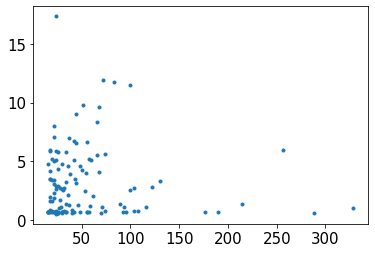

In [96]:
plt.plot(T['BRADY_DURATION_MEDIAN_PR_dyn'],T['BRADY_NUM_PER_HOUR_PR_dyn'],".")

(array([ 48., 286., 131.,  54.,  30.,  14.,  16.,  11.,   5.,   5.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 1 Patch objects>)

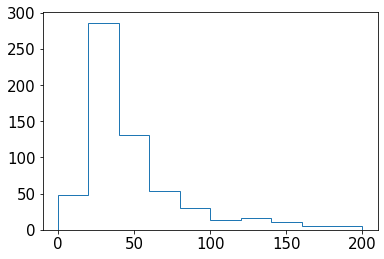

In [101]:
plt.hist(T['BRADY_DURATION_MEDIAN_PR'].dropna(),range=(0,200),histtype='step')